In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('netflix_titles.csv')


In [3]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [4]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


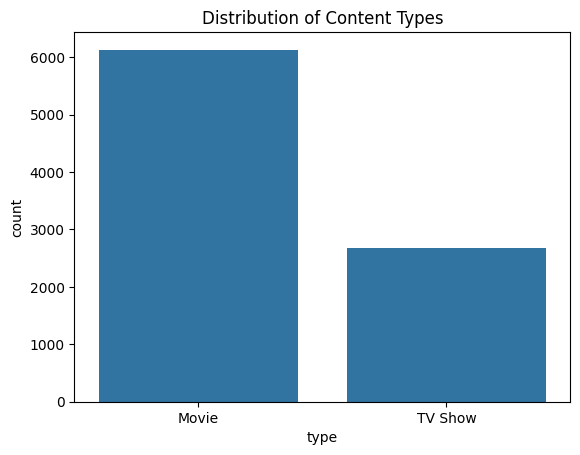

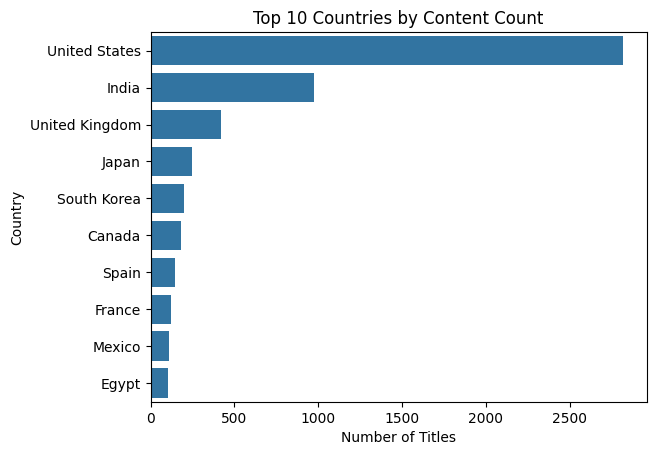

In [6]:
sns.countplot(data=df, x='type')
plt.title('Distribution of Content Types')
plt.show()

top_countries = df['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Countries by Content Count')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()


In [14]:
df['date_added'] = pd.to_datetime(df['date_added'].astype(str).str.strip(), errors='coerce')
df['year_added'] = df['date_added'].dt.year


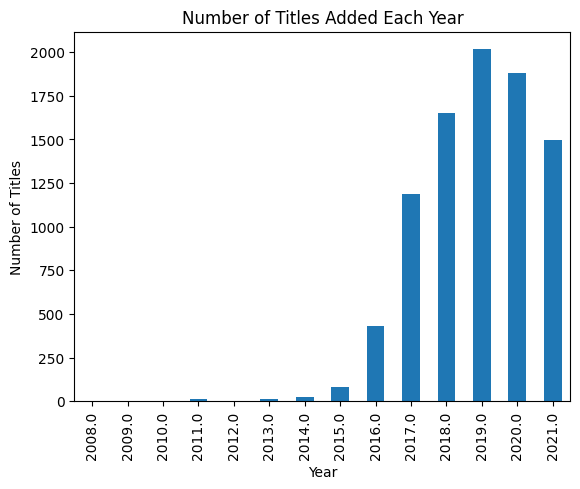

In [15]:
df['year_added'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Titles Added Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()


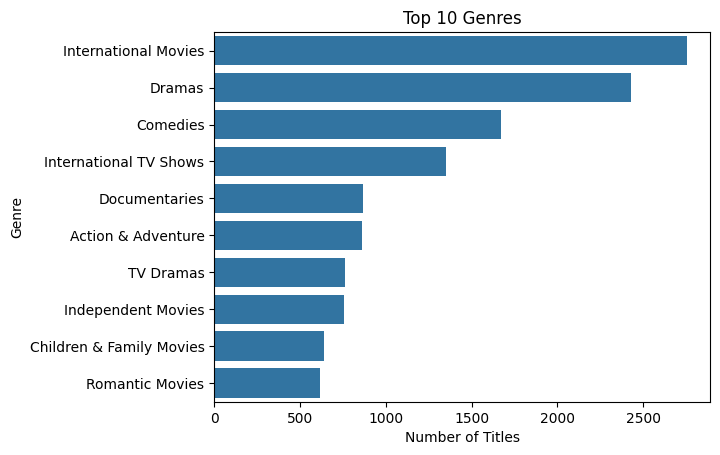

In [16]:
from collections import Counter

# Split the genres and count them
genres = df['listed_in'].dropna().apply(lambda x: x.split(', '))
genre_counts = Counter([genre for sublist in genres for genre in sublist])

# Get the top 10 genres
top_genres = genre_counts.most_common(10)
genres, counts = zip(*top_genres)

sns.barplot(x=list(counts), y=list(genres))
plt.title('Top 10 Genres')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()
